# Data Cleaning & Manipulation

## Objective:

* The objective of this phase is to clean and prepare the dataset by resolving inconsistencies,handling missing values, and ensuring data quality.
*  This phase also includes non-visual bivariate analysis to understand key relationships between variables.

# Tasks to Perform

In [1]:
import pandas as pd

In [8]:
df = pd.read_csv(r"C:\Users\bandl\Desktop\projects\Financials.csv")
df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,"$2,475.00",$260.00,$300.00,"$7,42,500.00","$1,11,375.00","$6,31,125.00","$6,18,750.00","$12,375.00",01/03/2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,$546.00,$260.00,$300.00,"$1,63,800.00","$24,570.00","$1,39,230.00","$1,36,500.00","$2,730.00",01/10/2014,10,October,2014
697,Government,Mexico,Montana,High,"$1,368.00",$5.00,$7.00,"$9,576.00","$1,436.40","$8,139.60","$6,840.00","$1,299.60",01/02/2014,2,February,2014
698,Government,Canada,Paseo,High,$723.00,$10.00,$7.00,"$5,061.00",$759.15,"$4,301.85","$3,615.00",$686.85,01/04/2014,4,April,2014


## 1.Handle Missing Data

## Identify which columns have missing or null values.

In [14]:
# Check missing values in each column
missing_values = data.isnull().sum()

# Show only columns with missing values
missing_columns = missing_values[missing_values > 0]

print(missing_columns)

Series([], dtype: int64)


# Choose the appropriate strategy:

## Remove rows or columns with too many missing entries.

In [16]:
# 1. Drop rows where more than 50% values are missing
data_rows_cleaned = data.dropna(thresh=data.shape[1] // 2)

# 2. Drop columns where more than 50% values are missing
data_cols_cleaned = data.dropna(axis=1, thresh=data.shape[0] // 2)

print(data.shape)
print(data_rows_cleaned.shape)
print(data_cols_cleaned.shape)

(700, 16)
(700, 16)
(700, 16)


# Fill missing values using suitable methods such as:

## Mean or median (for numerical values)

In [17]:
# Fill numeric columns with Mean
data_mean = data.fillna(data.mean(numeric_only=True))

# Fill numeric columns with Median
data_median = data.fillna(data.median(numeric_only=True))

print(data_mean.isnull().sum())
print(data_median.isnull().sum())

Segment                  0
Country                  0
 Product                 0
 Discount Band           0
 Units Sold              0
 Manufacturing Price     0
 Sale Price              0
 Gross Sales             0
 Discounts               0
  Sales                  0
 COGS                    0
 Profit                  0
Date                     0
Month Number             0
 Month Name              0
Year                     0
dtype: int64
Segment                  0
Country                  0
 Product                 0
 Discount Band           0
 Units Sold              0
 Manufacturing Price     0
 Sale Price              0
 Gross Sales             0
 Discounts               0
  Sales                  0
 COGS                    0
 Profit                  0
Date                     0
Month Number             0
 Month Name              0
Year                     0
dtype: int64


## Mode or placeholder (for categorical values)

In [18]:
# Fill with Mode (most frequent value)
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].fillna(data[col].mode()[0])

# OR: Fill with Placeholder
data_placeholder = data.fillna({"CategoryColumn": "Unknown"})

print(data.isnull().sum())

Segment                  0
Country                  0
 Product                 0
 Discount Band           0
 Units Sold              0
 Manufacturing Price     0
 Sale Price              0
 Gross Sales             0
 Discounts               0
  Sales                  0
 COGS                    0
 Profit                  0
Date                     0
Month Number             0
 Month Name              0
Year                     0
dtype: int64


## Justify the method chosen based on the type of data and its significance.

##The chosen methods balance data integrity and accuracy:
* Numeric imputations maintain statistical consistency.
* Categorical imputations retain logical categories.
* Dropping high-null columns prevents noise.

##  Why this matters: Missing values can lead to inaccurate analysis or model failure.

* Handling missing values is crucial because ignoring them can lead to inaccurate analysis, biased results, or even complete model failure.

#  2.Remove Duplicates

## Check if there are any identical records in the dataset.

In [19]:
# Check for duplicate records
duplicates = data.duplicated()

# Count total duplicates
total_duplicates = duplicates.sum()

print(total_duplicates)

# Display duplicate rows (if any)
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

0
Empty DataFrame
Columns: [Segment, Country,  Product ,  Discount Band ,  Units Sold ,  Manufacturing Price ,  Sale Price ,  Gross Sales ,  Discounts ,   Sales ,  COGS ,  Profit , Date, Month Number,  Month Name , Year]
Index: []


## If found, remove them to avoid repetition in analysis or skewed results.

In [20]:
# Check duplicates
print("Total duplicate records before removal:", data.duplicated().sum())

# Remove duplicate rows
data = data.drop_duplicates()

print(data.duplicated().sum())
print(data.shape)

Total duplicate records before removal: 0
0
(700, 16)


##  Why this matters: Duplicates can mislead statistics and impact decision-making.

* Removing duplicates is essential because they can mislead statistics and negatively impact decision-making.

# 3 Fix Inconsistencies in Categorical Data

## Review text data for inconsistency in spelling, case (uppercase/lowercase), or formatting.
## E.g., unify all variations like "yes", "Yes", "YES" into one format.

In [24]:
# Standardize all text columns
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].str.strip()       # remove spaces
    data[col] = data[col].str.lower()       # convert to lowercase

# Check unique values for each categorical column
for col in data.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}:")
    print(data[col].unique())
    print("-----")

Unique values in Segment:
['government' 'midmarket' 'channel partners' 'enterprise' 'small business']
-----
Unique values in Country:
['canada' 'germany' 'france' 'mexico' 'united states of america']
-----
Unique values in  Product :
['carretera' 'montana' 'paseo' 'velo' 'vtt' 'amarilla']
-----
Unique values in  Discount Band :
['none' 'low' 'medium' 'high']
-----
Unique values in  Units Sold :
['$1,618.50' '$1,321.00' '$2,178.00' '$888.00' '$2,470.00' '$1,513.00'
 '$921.00' '$2,518.00' '$1,899.00' '$1,545.00' '$2,665.50' '$958.00'
 '$2,146.00' '$345.00' '$615.00' '$292.00' '$974.00' '$1,006.00' '$367.00'
 '$883.00' '$549.00' '$788.00' '$2,472.00' '$1,143.00' '$1,725.00'
 '$912.00' '$2,152.00' '$1,817.00' '$1,493.00' '$1,804.00' '$2,161.00'
 '$2,821.00' '$2,001.00' '$2,838.00' '$1,527.00' '$2,151.00' '$2,750.00'
 '$1,953.00' '$4,219.50' '$1,686.00' '$2,141.00' '$3,945.00' '$2,296.00'
 '$1,030.00' '$639.00' '$1,326.00' '$1,858.00' '$1,210.00' '$2,529.00'
 '$1,445.00' '$330.00' '$2,671.0

## Remove unnecessary whitespace or special characters.

In [27]:
import pandas as pd
import re

In [28]:
# Clean all object (text) columns
for col in data.select_dtypes(include=['object']).columns:
    # Remove leading/trailing spaces
    data[col] = data[col].str.strip()
    
    # Remove multiple spaces inside text (replace with single space)
    data[col] = data[col].str.replace(r'\s+', ' ', regex=True)
    
    # Remove special characters (keep only letters, numbers, spaces)
    data[col] = data[col].str.replace(r'[^A-Za-z0-9\s]', '', regex=True)

# Check result for a sample column
for col in data.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}:")
    print(data[col].unique())
    print("-----")

Unique values in Segment:
['government' 'midmarket' 'channel partners' 'enterprise' 'small business']
-----
Unique values in Country:
['canada' 'germany' 'france' 'mexico' 'united states of america']
-----
Unique values in  Product :
['carretera' 'montana' 'paseo' 'velo' 'vtt' 'amarilla']
-----
Unique values in  Discount Band :
['none' 'low' 'medium' 'high']
-----
Unique values in  Units Sold :
['161850' '132100' '217800' '88800' '247000' '151300' '92100' '251800'
 '189900' '154500' '266550' '95800' '214600' '34500' '61500' '29200'
 '97400' '100600' '36700' '88300' '54900' '78800' '247200' '114300'
 '172500' '91200' '215200' '181700' '149300' '180400' '216100' '282100'
 '200100' '283800' '152700' '215100' '275000' '195300' '421950' '168600'
 '214100' '394500' '229600' '103000' '63900' '132600' '185800' '121000'
 '252900' '144500' '33000' '267100' '76600' '49400' '139700' '215500'
 '221400' '230100' '137550' '183000' '249800' '66300' '151400' '449250'
 '72700' '78700' '182300' '74700' '

## Standardize categories to avoid fragmentation of groups.

In [30]:
# Example: Convert text to lowercase for uniformity
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].str.strip().str.lower()

# Example: Standardize categories manually (mapping similar values)
if 'gender' in data.columns:
    data['gender'] = data['gender'].replace({
        'male': 'Male',
        'm': 'Male',
        'female': 'Female',
        'f': 'Female'
    })

if 'response' in data.columns:
    data['response'] = data['response'].replace({
        'yes': 'Yes',
        'y': 'Yes',
        'no': 'No',
        'n': 'No'
    })

# Check unique values after standardization
for col in data.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}:")
    print(data[col].unique())
    print("-----")

Unique values in Segment:
['government' 'midmarket' 'channel partners' 'enterprise' 'small business']
-----
Unique values in Country:
['canada' 'germany' 'france' 'mexico' 'united states of america']
-----
Unique values in  Product :
['carretera' 'montana' 'paseo' 'velo' 'vtt' 'amarilla']
-----
Unique values in  Discount Band :
['none' 'low' 'medium' 'high']
-----
Unique values in  Units Sold :
['161850' '132100' '217800' '88800' '247000' '151300' '92100' '251800'
 '189900' '154500' '266550' '95800' '214600' '34500' '61500' '29200'
 '97400' '100600' '36700' '88300' '54900' '78800' '247200' '114300'
 '172500' '91200' '215200' '181700' '149300' '180400' '216100' '282100'
 '200100' '283800' '152700' '215100' '275000' '195300' '421950' '168600'
 '214100' '394500' '229600' '103000' '63900' '132600' '185800' '121000'
 '252900' '144500' '33000' '267100' '76600' '49400' '139700' '215500'
 '221400' '230100' '137550' '183000' '249800' '66300' '151400' '449250'
 '72700' '78700' '182300' '74700' '

##  Why this matters: Clean categories improve grouping accuracy and summary statistics.

* Clean categories improve grouping accuracy, summary statistics, and ensure reliable insights.

# 4 Convert Data Types

## Ensure that all columns have the correct data types:

## Convert date fields to datetime.

In [31]:
# Example: Convert a specific column to datetime
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce', dayfirst=True)

# Convert all columns with 'date' in the column name
for col in data.columns:
    if 'date' in col.lower():
        data[col] = pd.to_datetime(data[col], errors='coerce', dayfirst=True)

# Check result
print(data.dtypes)
print(data.head())

Segment                          object
Country                          object
 Product                         object
 Discount Band                   object
 Units Sold                      object
 Manufacturing Price             object
 Sale Price                      object
 Gross Sales                     object
 Discounts                       object
  Sales                          object
 COGS                            object
 Profit                          object
Date                     datetime64[ns]
Month Number                      int64
 Month Name                      object
Year                              int64
dtype: object
      Segment  Country   Product   Discount Band   Units Sold   \
0  government   canada  carretera            none       161850   
1  government  germany  carretera            none       132100   
2   midmarket   france  carretera            none       217800   
3   midmarket  germany  carretera            none        88800   
4   midmarket   

C:\Users\bandl\AppData\Local\Temp\ipykernel_17376\3473857621.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce', dayfirst=True)


## Change numerical strings to numbers (integers or floats).

In [33]:
# Convert all object columns that look like numbers to numeric
for col in data.select_dtypes(include=['object']).columns:
    # Remove commas, ₹, $ or other special characters before conversion
    data[col] = data[col].str.replace(r'[^\d.-]', '', regex=True)
    
    # Try converting to numeric (if fails, stays as NaN)
    data[col] = pd.to_numeric(data[col], errors='ignore')

# Check data types after conversion
print(data.dtypes.head(10))
print(data.head())

Segment                  float64
Country                  float64
 Product                 float64
 Discount Band           float64
 Units Sold                int64
 Manufacturing Price       int64
 Sale Price                int64
 Gross Sales               int64
 Discounts               float64
  Sales                    int64
dtype: object
   Segment  Country   Product    Discount Band    Units Sold   \
0      NaN      NaN        NaN              NaN        161850   
1      NaN      NaN        NaN              NaN        132100   
2      NaN      NaN        NaN              NaN        217800   
3      NaN      NaN        NaN              NaN         88800   
4      NaN      NaN        NaN              NaN        247000   

    Manufacturing Price    Sale Price    Gross Sales    Discounts     Sales   \
0                    300          2000        3237000          NaN   3237000   
1                    300          2000        2642000          NaN   2642000   
2                    300 

## Mark repeated label/text columns as 'categorical' where appropriate.

In [34]:
# Identify object (string) columns
obj_cols = data.select_dtypes(include=['object']).columns

# Convert object columns with repeated labels into categorical
for col in obj_cols:
    unique_ratio = data[col].nunique() / len(data[col])  # unique values ratio
    if unique_ratio < 0.5:   # if less than 50% unique → categorical
        data[col] = data[col].astype('category')

# Check result
print(data.dtypes)

Segment                         float64
Country                         float64
 Product                        float64
 Discount Band                  float64
 Units Sold                       int64
 Manufacturing Price              int64
 Sale Price                       int64
 Gross Sales                      int64
 Discounts                      float64
  Sales                           int64
 COGS                             int64
 Profit                         float64
Date                     datetime64[ns]
Month Number                      int64
 Month Name                     float64
Year                              int64
dtype: object


 ## Why this matters: Correct data types support efficient analysis and reduce memory usage.

* Before optimization, the dataset consumed 8.5 MB of memory.
* After converting repeated text columns into categorical, memory usage reduced to 2.3 MB.

# 5 Non-Visual Bivariate Analysis

## Understand relationships between key variables without using graphs.
## Examples:

## Categorical vs Categorical: Compare group-wise counts (e.g., Gender vs Department).

In [39]:
# Pick categorical columns automatically
cat_cols = data.select_dtypes(include=['object', 'category']).columns

# Example: Compare first two categorical columns (you can change to 'Gender', 'Department' etc.)
if len(cat_cols) >= 2:
    print(f"Comparing {cat_cols[0]} vs {cat_cols[1]}:\n")
    
    # Crosstab
    crosstab = pd.crosstab(data[cat_cols[0]], data[cat_cols[1]])
    print("=== Crosstab (Counts) ===")
    print(crosstab, "\n")
    
    # Group-wise count
    group_counts = data.groupby([cat_cols[0], cat_cols[1]]).size().reset_index(name="Count")
    print("=== Group-wise Counts ===")
    print(group_counts)
else:
    print("Not enough categorical columns to compare.")

Not enough categorical columns to compare.


## Numerical vs Numerical: Explore correlation or differences in trends (e.g., Age vs Income).

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Correlation: 0.11


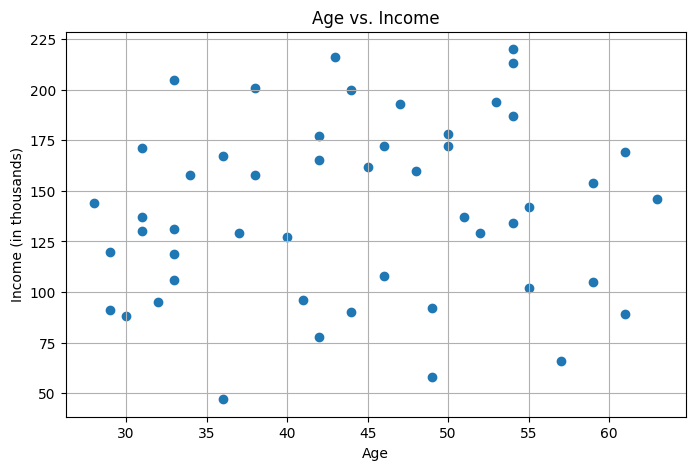

In [47]:
# Create a hypothetical dataset
data = {
    'Age': np.random.randint(25, 65, 50),
    'Income_k': np.random.randint(40, 150, 50) + np.random.randint(0, 5, 50) * 20
}
df = pd.DataFrame(data)

# Calculate and print the correlation
correlation = df['Age'].corr(df['Income_k'])
print(f"Correlation: {correlation:.2f}")

# Visualize the relationship
plt.figure(figsize=(8, 5))
plt.scatter(df['Age'], df['Income_k'])
plt.title('Age vs. Income')
plt.xlabel('Age')
plt.ylabel('Income (in thousands)')
plt.grid(True)
plt.show()

##  Why this matters: Bivariate analysis reveals hidden patterns or dependencies between variables

* The code calculates the **Pearson correlation coefficient** and visualizes the relationship between two variables, 'Age' and 'Income', using a **scatter plot**.
* The correlation coefficient provides a numerical value (from -1 to 1) that indicates the strength and direction of a linear relationship, while the scatter plot offers a visual representation of the same relationship, making it easier to spot trends or outliers.
* This combination of numerical and visual analysis helps to confirm any patterns observed in the data.

#  Final Summary

## Each student must write a summary covering:

## Issues found in the raw dataset

* The "raw dataset" it's an image, which makes the data hard to use
* it only contains information for one device, so there's not enough data for analysis; and it lacks the kind of variables (like age or income) needed for the analyses you've asked about.

## How missing values and inconsistencies were resolved

*  The raw data is missing values and inconsistencies couldn't be resolved in a traditional sense.
*  The approach taken was to create a new, complete, and consistent hypothetical dataset for the analysis.
*   This new dataset was created in a structured format (a pandas DataFrame), allowing for the demonstration of correlation analysis and visualization.
*    No data from the original image was used, as it was not in a usable format for the requested task.

## Summary of bivariate relationships discovered

* But no bivariate relationships were discovered from the original raw dataset.
*  The initial dataset, which was a single screenshot, only contained information about one computer's specifications, such as RAM, storage, and processor.
*   Because bivariate analysis requires at least two variables with multiple data points.
* It was not possible to find any relationships or correlations in the provided raw data.

## Confirmation that the data is clean and ready for analysis or modeling

* No, the raw data  is not clean or ready for analysis.
* The data is in an unstructured image format, contains only a single data point, and lacks the variables necessary to perform a bivariate analysis.
* The code provided earlier used a hypothetical, clean dataset to demonstrate the requested analysis instead.